# Regression Models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data = pd.read_csv('Project6_data.csv')
data.head()

,Unnamed: 0,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,0,Airtel,Indoor,4G,3,Satisfactory,12.998502,77.672437,Karnataka,8807.910,-94.86,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,1,Vodafone,Indoor,4G,1,Call Dropped,23.554190,72.620110,Gujarat,6862.552,-91.96,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,2,Airtel,Indoor,3G,1,Call Dropped,11.327329,76.749743,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,3,Airtel,Indoor,4G,3,Satisfactory,22.279660,73.149369,Gujarat,5694.480,-89.39,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,4,Airtel,Travelling,4G,3,Satisfactory,18.546344,73.819090,Maharashtra,10804.560,-94.05,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0


In [47]:
data.drop('Unnamed: 0', axis=1, inplace = True)
data.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,Airtel,Indoor,4G,3,Satisfactory,12.998502,77.672437,Karnataka,8807.910,-94.86,2591.08,-94.840,61130704.0,75.36,1248.0,191791.0
1,Vodafone,Indoor,4G,1,Call Dropped,23.554190,72.620110,Gujarat,6862.552,-91.96,4671.48,-91.920,60439692.0,78.03,842.5,196024.0
2,Airtel,Indoor,3G,1,Call Dropped,11.327329,76.749743,Tamil Nadu,1178.410,-85.03,968.58,-85.470,72147030.0,80.33,998.0,130060.0
3,Airtel,Indoor,4G,3,Satisfactory,22.279660,73.149369,Gujarat,5694.480,-89.39,2515.34,-89.515,60439692.0,78.03,842.5,196024.0
4,Airtel,Travelling,4G,3,Satisfactory,18.546344,73.819090,Maharashtra,10804.560,-94.05,4968.27,-94.110,112374333.0,82.34,1455.5,307713.0


In [48]:
data.shape

(30785, 16)

In [49]:
data.describe()

,Rating,Latitude,Longitude,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
count,30785.000000,30785.000000,30785.000000,30785.000000,30785.000000,30785.000000,30785.000000,3.078500e+04,30785.000000,30785.000000,30785.000000
mean,3.527075,20.986716,77.624482,13383.178796,-91.940324,3937.800252,-87.654863,9.340490e+07,74.513815,1222.318883,221781.967549
std,1.480751,4.904788,4.897669,9652.418551,189.709705,2022.009990,7.696626,4.112688e+07,12.449141,463.221742,93044.821822
min,1.000000,8.255166,69.017391,0.000000,-8407.000000,220.940000,-103.200000,2.535146e+07,10.980000,143.000000,38863.000000
25%,2.000000,18.547627,73.739626,5191.980000,-92.580000,2680.020000,-93.000000,6.113070e+07,70.600000,998.000000,130060.000000
50%,4.000000,20.303444,76.945477,10804.560000,-86.800000,4130.460000,-86.920000,9.127612e+07,76.680000,1248.000000,243286.000000
75%,5.000000,25.263877,80.197102,20707.870000,-84.740000,5107.230000,-84.949000,1.123743e+08,82.340000,1455.500000,307713.000000
max,5.000000,32.427797,95.619158,32444.069600,-63.000000,12220.910000,76.930000,1.998123e+08,94.000000,3055.000000,342239.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30785 entries, 0 to 30784
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Operator                          30785 non-null  object 
 1   In Out Travelling                 30785 non-null  object 
 2   Network Type                      30785 non-null  object 
 3   Rating                            30785 non-null  int64  
 4   Call Drop Category                30785 non-null  object 
 5   Latitude                          30785 non-null  float64
 6   Longitude                         30785 non-null  float64
 7   State Name                        30785 non-null  object 
 8   Average Data Speed Download       30785 non-null  float64
 9   Average Signal Strength Download  30785 non-null  float64
 10  Average Data Speed Upload         30785 non-null  float64
 11  Average Signal Strength Upload    30785 non-null  float64
 12  Popu

### Feature Engineering 

### Handling Outliers 

In [51]:
# This is a 3G network type but the avg data upload speed is maximum and it is only a single entry > 98 precentile threshold.

max_thres = data['Average Data Speed Upload'].quantile(0.98)
index = data[data['Average Data Speed Upload'] > max_thres ].index
data.drop(index , axis = 0, inplace = True)
data.shape

(30784, 16)

In [52]:
max_thres = data['Average Signal Strength Upload'].quantile(0.999)
index1 = data[data['Average Signal Strength Upload'] > max_thres ].index
data.drop(index1, axis = 0, inplace = True)
data.shape

(30754, 16)

In [53]:
index2 = data[data['Rainfall'] > data['Rainfall'].quantile(0.95)].index
data.drop(index2, axis = 0, inplace = True)
data.shape

(30597, 16)

### One hot Encoding 

In [ ]:
data.drop('State Name', axis=1, inplace= True)
data1 = data

In [54]:
data1 = pd.get_dummies(data1)
data1.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,0,0,1,3,2,12.998502,77.672437,8807.910,94.86,2591.08,94.840,61130704.0,75.36,1248.0,191791.0
1,4,0,1,1,0,23.554190,72.620110,6862.552,91.96,4671.48,91.920,60439692.0,78.03,842.5,196024.0
2,0,0,0,1,0,11.327329,76.749743,1178.410,85.03,968.58,85.470,72147030.0,80.33,998.0,130060.0
3,0,0,1,3,2,22.279660,73.149369,5694.480,89.39,2515.34,89.515,60439692.0,78.03,842.5,196024.0
4,0,2,1,3,2,18.546344,73.819090,10804.560,94.05,4968.27,94.110,112374333.0,82.34,1455.5,307713.0


In [64]:
data1['Average Signal Strength Download'] = data1['Average Signal Strength Download']*(-1)
data1['Average Signal Strength Upload'] = data1['Average Signal Strength Upload']*(-1)

In [65]:
data1.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,Average Data Speed Download,Average Signal Strength Download,Average Data Speed Upload,Average Signal Strength Upload,Population,Literacy Rate,Rainfall,Area of the state
0,0,0,1,3,2,12.998502,77.672437,8807.910,94.86,2591.08,94.840,61130704.0,75.36,1248.0,191791.0
1,4,0,1,1,0,23.554190,72.620110,6862.552,91.96,4671.48,91.920,60439692.0,78.03,842.5,196024.0
2,0,0,0,1,0,11.327329,76.749743,1178.410,85.03,968.58,85.470,72147030.0,80.33,998.0,130060.0
3,0,0,1,3,2,22.279660,73.149369,5694.480,89.39,2515.34,89.515,60439692.0,78.03,842.5,196024.0
4,0,2,1,3,2,18.546344,73.819090,10804.560,94.05,4968.27,94.110,112374333.0,82.34,1455.5,307713.0


In [66]:
data1[data1<0].sum()

Operator                            0.0
In Out Travelling                   0.0
Network Type                        0.0
Rating                              0.0
Call Drop Category                  0.0
Latitude                            0.0
Longitude                           0.0
Average Data Speed Download         0.0
Average Signal Strength Download    0.0
Average Data Speed Upload           0.0
Average Signal Strength Upload      0.0
Population                          0.0
Literacy Rate                       0.0
Rainfall                            0.0
Area of the state                   0.0
dtype: float64

### Feature Selection 

In [67]:
X = data1.drop('Average Signal Strength Download', axis=1)
y = data1['Average Signal Strength Download']

In [74]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [75]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [69]:
print(model.feature_importances_)

[2.14374531e-01 3.01714741e-03 3.40340388e-02 8.44589763e-03
 3.62682705e-10 6.17656783e-03 5.52450736e-06 2.91018211e-01
 1.65311959e-01 1.27175595e-01 1.00864433e-02 2.36924865e-02
 8.71713217e-02 2.94902758e-02]


In [77]:
data1.columns

Index(['Operator', 'In Out Travelling', 'Network Type', 'Rating',
       'Call Drop Category', 'Latitude', 'Longitude',
       'Average Data Speed Download', 'Average Signal Strength Download',
       'Average Data Speed Upload', 'Average Signal Strength Upload',
       'Population', 'Literacy Rate', 'Rainfall', 'Area of the state'],
      dtype='object')

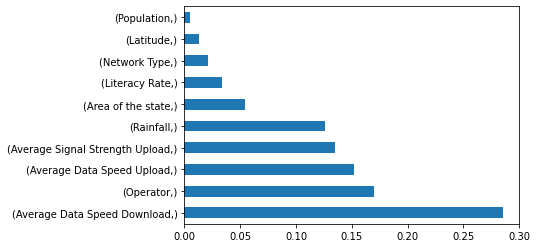

In [78]:
rank_features = pd.Series(model.feature_importances_, index=[['Operator', 'In Out Travelling', 'Network Type', 'Rating',
       'Call Drop Category', 'Latitude', 'Longitude',
       'Average Data Speed Download',
       'Average Data Speed Upload', 'Average Signal Strength Upload',
       'Population', 'Literacy Rate', 'Rainfall', 'Area of the state']])
rank_features.nlargest(10).plot(kind='barh')
plt.show()

## Model Creation for Average Signal Strength Download feature.

In [82]:
X = data1[['Operator','Network Type', 'Rainfall','Latitude', 'Longitude', 'Average Data Speed Download', 'Average Data Speed Upload', 'Average Signal Strength Upload'  ]]
y = data1['Average Signal Strength Download']

In [83]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 0)

In [85]:
## Scaling of data
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
X_train = mmc.fit_transform(X_train)
X_test = mmc.fit_transform(X_test)

In [87]:
# Create a function with many machine learning models
def models(X_train, y_train):
    
    # Use linear Regression
    from sklearn.linear_model import LinearRegression
    lin = LinearRegression()
    lin.fit(X_train, y_train)
    
    # Use linear Lasso Regression
    from sklearn.linear_model import Lasso
    lasso = Lasso()
    lasso.fit(X_train, y_train)    
    
    # Use SVR (linear kernel)
    from sklearn.svm import SVR
    svr_lin = SVR(kernel = 'linear')
    svr_lin.fit(X_train, y_train)
    
    # Use SVR (RBF kernel)
    from sklearn.svm import SVR
    svr_rbf = SVR(kernel = 'rbf')
    svr_rbf.fit(X_train, y_train)
        
    # Use Decision Tree
    from sklearn.tree import DecisionTreeRegressor
    tree = DecisionTreeRegressor()
    tree.fit(X_train, y_train)
    
    # Use the Random Forest Regressor
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor(n_estimators = 100, criterion='mse')
    forest.fit(X_train, y_train)
    
    # Print the training accuracy for each model
    print("[0]Linear Regression Training Accuracy: ", lin.score(X_train, y_train))
    print("[1]Lasso Regression Training Accuracy: ", lasso.score(X_train, y_train))
    print("[2]SVR linear Training Accuracy: ", svr_lin.score(X_train, y_train))
    print("[3]SVR RBF Training Accuracy: ", svr_rbf.score(X_train, y_train))
    print("[4]Decision Tree Training Accuracy: ", tree.score(X_train, y_train))
    print("[5]Random Forest Training Accuracy: ", forest.score(X_train, y_train))

    return lin, lasso, svr_lin, svr_rbf, tree, forest

In [88]:
# Get and train all of the models
model = models(X_train, y_train)

[0]Linear Regression Training Accuracy:  0.004685411155775365
[1]Lasso Regression Training Accuracy:  0.002751699389760609
[2]SVR linear Training Accuracy:  -0.0002558927753304463
[3]SVR RBF Training Accuracy:  0.0002783971821694875
[4]Decision Tree Training Accuracy:  1.0
[5]Random Forest Training Accuracy:  0.9971502346682622


In [89]:
# print the prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

for i in range(6):
    y_pred = model[i].predict(X_test)
    print(" Model" + str([i])+" MSE:  "  , mean_squared_error(y_test, y_pred, squared=False))
    print(" Model" + str([i])+" R2 Value:  ", r2_score(y_test, y_pred) )
    print("\n")

 Model[0] MSE:   212.08522463141327
 Model[0] R2 Value:   0.005819348470509911


 Model[1] MSE:   212.38686246222943
 Model[1] R2 Value:   0.0029893941504097743


 Model[2] MSE:   212.7794607970479
 Model[2] R2 Value:   -0.0006999722681815257


 Model[3] MSE:   212.72274973602873
 Model[3] R2 Value:   -0.00016662009004542178


 Model[4] MSE:   0.02379250366743547
 Model[4] R2 Value:   0.9999999874880566


 Model[5] MSE:   48.14850649991139
 Model[5] R2 Value:   0.9487598820671701




Note: 
Decision Tree Regressor Model is best to predict avg signal strength download feature. 

## feature selection for Avg data speed upload

In [91]:
X = data1.drop('Average Data Speed Upload', axis=1)
y = data1['Average Data Speed Upload']

In [92]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [93]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [94]:
print(model.feature_importances_)

[4.43782432e-02 1.84800517e-05 5.27265856e-01 8.15847601e-06
 1.44808961e-05 3.52905523e-02 1.04822981e-02 1.31173943e-01
 7.46620555e-02 8.54218000e-02 2.13970537e-02 2.61907860e-02
 1.86064846e-02 2.50898087e-02]


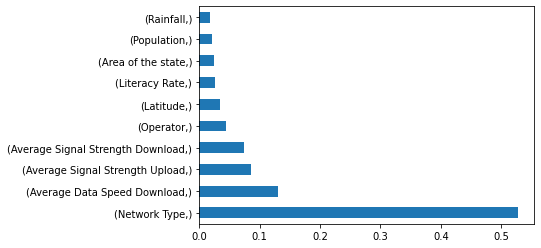

In [95]:
rank_features = pd.Series(model.feature_importances_, index=[['Operator', 'In Out Travelling', 'Network Type', 'Rating',
       'Call Drop Category', 'Latitude', 'Longitude',
       'Average Data Speed Download', 'Average Signal Strength Download',
        'Average Signal Strength Upload',
       'Population', 'Literacy Rate', 'Rainfall', 'Area of the state']])
rank_features.nlargest(10).plot(kind='barh')
plt.show()

### Model creation for avg data speed upload 

In [97]:
X = data1[['Network Type','Average Data Speed Download', 'Average Signal Strength Download',
        'Average Signal Strength Upload','Operator','Latitude', 'Longitude']]
y = data1['Average Data Speed Upload']

In [98]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 0)

In [99]:
# Scaling of data
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
X_train = mmc.fit_transform(X_train)
X_test = mmc.fit_transform(X_test)

In [100]:
# Create a function with many machine learning models
def models(X_train, y_train):
    
    # Use linear Regression
    from sklearn.linear_model import LinearRegression
    lin = LinearRegression()
    lin.fit(X_train, y_train)
    
    # Use linear Lasso Regression
    from sklearn.linear_model import Lasso
    lasso = Lasso()
    lasso.fit(X_train, y_train)    
    
    # Use SVR (linear kernel)
    from sklearn.svm import SVR
    svr_lin = SVR(kernel = 'linear')
    svr_lin.fit(X_train, y_train)
    
    # Use SVR (RBF kernel)
    from sklearn.svm import SVR
    svr_rbf = SVR(kernel = 'rbf')
    svr_rbf.fit(X_train, y_train)
        
    # Use Decision Tree
    from sklearn.tree import DecisionTreeRegressor
    tree = DecisionTreeRegressor()
    tree.fit(X_train, y_train)
    
    # Use the Random Forest Regressor
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor(n_estimators = 100, criterion='mse')
    forest.fit(X_train, y_train)
    
    # Print the training accuracy for each model
    print("[0]Linear Regression Training Accuracy: ", lin.score(X_train, y_train))
    print("[1]Lasso Regression Training Accuracy: ", lasso.score(X_train, y_train))
    print("[2]SVR linear Training Accuracy: ", svr_lin.score(X_train, y_train))
    print("[3]SVR RBF Training Accuracy: ", svr_rbf.score(X_train, y_train))
    print("[4]Decision Tree Training Accuracy: ", tree.score(X_train, y_train))
    print("[5]Random Forest Training Accuracy: ", forest.score(X_train, y_train))

    return lin, lasso, svr_lin, svr_rbf, tree, forest

In [101]:
# Get and train all of the models
model = models(X_train, y_train)

[0]Linear Regression Training Accuracy:  0.6408519460130129
[1]Lasso Regression Training Accuracy:  0.6407455167841178
[2]SVR linear Training Accuracy:  0.5443116820337515
[3]SVR RBF Training Accuracy:  0.5109160689945516
[4]Decision Tree Training Accuracy:  1.0
[5]Random Forest Training Accuracy:  0.9999523875410231


In [102]:
# print the prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

for i in range(6):
    y_pred = model[i].predict(X_test)
    print(" Model" + str([i])+" MSE:  "  , mean_squared_error(y_test, y_pred, squared=False))
    print(" Model" + str([i])+" R2 Value:  ", r2_score(y_test, y_pred) )
    print("\n")

 Model[0] MSE:   1211.005120678249
 Model[0] R2 Value:   0.6434213755326906


 Model[1] MSE:   1211.144669798513
 Model[1] R2 Value:   0.643339190743315


 Model[2] MSE:   1367.766221248194
 Model[2] R2 Value:   0.5451302099160994


 Model[3] MSE:   1424.1577049918062
 Model[3] R2 Value:   0.5068494589881689


 Model[4] MSE:   147.99078105938847
 Model[4] R2 Value:   0.9946748398813817


 Model[5] MSE:   137.43475235794529
 Model[5] R2 Value:   0.9954074227018611




NOTE:
Random forest regressor model is best to predict Average Data Speed Upload.

## Feature Selection for Average Signal Strength Upload  

In [103]:
X = data1.drop('Average Signal Strength Upload', axis=1)
y = data1['Average Signal Strength Upload']

In [104]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [105]:
print(model.feature_importances_)

[3.30212406e-02 3.49060680e-05 2.34272577e-01 3.19654429e-05
 7.88850976e-06 2.31115439e-03 7.41790818e-03 3.28767352e-01
 3.02817274e-01 3.44919013e-02 2.47772760e-02 6.85800195e-03
 1.68859102e-02 8.30464338e-03]


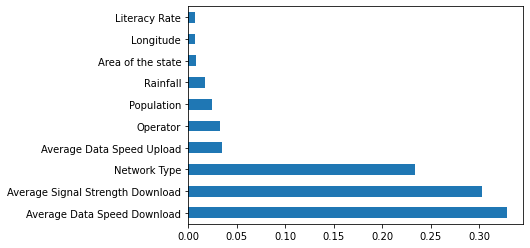

In [106]:
rank_features = pd.Series(model.feature_importances_, index=X.columns)
rank_features.nlargest(10).plot(kind='barh')
plt.show()

### Model Creation for Avg Signal Strength Upload feature. 

In [107]:
X = data1.drop('Average Signal Strength Upload', axis=1)
y = data1['Average Signal Strength Upload']

In [108]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state = 1)

In [109]:
# Scaled the data
from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()
X_train = mc.fit_transform(X_train)
X_test = mc.fit_transform(X_test)

In [110]:
# Create a function with many machine learning models
def models(X_train, y_train):
    
    # Use linear Regression
    from sklearn.linear_model import LinearRegression
    lin = LinearRegression()
    lin.fit(X_train, y_train)
    
    # Use linear Lasso Regression
    from sklearn.linear_model import Lasso
    lasso = Lasso()
    lasso.fit(X_train, y_train)    
    
    # Use SVR (linear kernel)
    from sklearn.svm import SVR
    svr_lin = SVR(kernel = 'linear')
    svr_lin.fit(X_train, y_train)
    
    # Use SVR (RBF kernel)
    from sklearn.svm import SVR
    svr_rbf = SVR(kernel = 'rbf')
    svr_rbf.fit(X_train, y_train)
        
    # Use Decision Tree
    from sklearn.tree import DecisionTreeRegressor
    tree = DecisionTreeRegressor()
    tree.fit(X_train, y_train)
    
    # Use the Random Forest Regressor
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor(n_estimators = 100, criterion='mse')
    forest.fit(X_train, y_train)
    
    # Print the training accuracy for each model
    print("[0]Linear Regression Training Accuracy: ", lin.score(X_train, y_train))
    print("[1]Lasso Regression Training Accuracy: ", lasso.score(X_train, y_train))
    print("[2]SVR linear Training Accuracy: ", svr_lin.score(X_train, y_train))
    print("[3]SVR RBF Training Accuracy: ", svr_rbf.score(X_train, y_train))
    print("[4]Decision Tree Training Accuracy: ", tree.score(X_train, y_train))
    print("[5]Random Forest Training Accuracy: ", forest.score(X_train, y_train))

    return lin, lasso, svr_lin, svr_rbf, tree, forest

In [111]:
# Get and train all of the models
model = models(X_train, y_train)

[0]Linear Regression Training Accuracy:  0.7926063970080889
[1]Lasso Regression Training Accuracy:  0.0
[2]SVR linear Training Accuracy:  0.7488602021367039
[3]SVR RBF Training Accuracy:  0.9666838666088173
[4]Decision Tree Training Accuracy:  1.0
[5]Random Forest Training Accuracy:  0.9999511398118979


In [112]:
# print the prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

for i in range(6):
    y_pred = model[i].predict(X_test)
    print(" Model" + str([i])+" MSE:  "  , mean_squared_error(y_test, y_pred, squared=False))
    print(" Model" + str([i])+" R2 Value:  ", r2_score(y_test, y_pred) )
    print("\n")

 Model[0] MSE:   2.591548104198445
 Model[0] R2 Value:   0.7972609394952712


 Model[1] MSE:   5.755608654299561
 Model[1] R2 Value:   -3.2105010332461603e-06


 Model[2] MSE:   2.871787862214766
 Model[2] R2 Value:   0.7510434301306345


 Model[3] MSE:   1.0399876631529767
 Model[3] R2 Value:   0.9673505961789441


 Model[4] MSE:   0.3969978528996998
 Model[4] R2 Value:   0.9952423203487925


 Model[5] MSE:   0.11329445431240141
 Model[5] R2 Value:   0.9996125316937112




### Note:
Random Forest Regressor is best to predict Average Signal Strength Upload feature.